In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-fitting-tempinterp)

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951–1980 average (source: NASA).

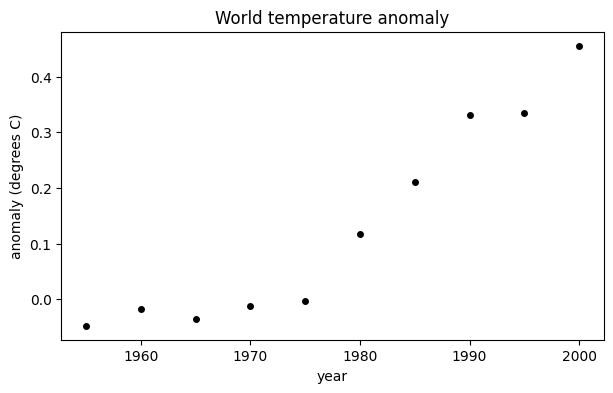

In [2]:
year = arange(1955,2005,5)
y = array([ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040,
    0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ])

fig, ax = subplots()
ax.scatter(year, y, color="k", label="data")
xlabel("year")
ylabel("anomaly (degrees C)")
title("World temperature anomaly");

A polynomial interpolant can be used to fit the data. Here we build one using a Vandermonde matrix. First, though, we express time as decades since 1950, as it improves the condition number of the matrix.

In [3]:
t = (year - 1950) / 10
V = vander(t)
c = linalg.solve(V, y)
print(c)

[ 1.03111111e-02 -2.54666667e-01  2.69480635e+00 -1.59628889e+01
  5.80155778e+01 -1.33273472e+02  1.91960567e+02 -1.65455972e+02
  7.63617381e+01 -1.41140000e+01]


```{index} Python; plotting functions
```

The coefficients in vector `c` are used to create a polynomial. Then we create a function that evaluates the polynomial after changing the time variable as we did for the Vandermonde matrix.

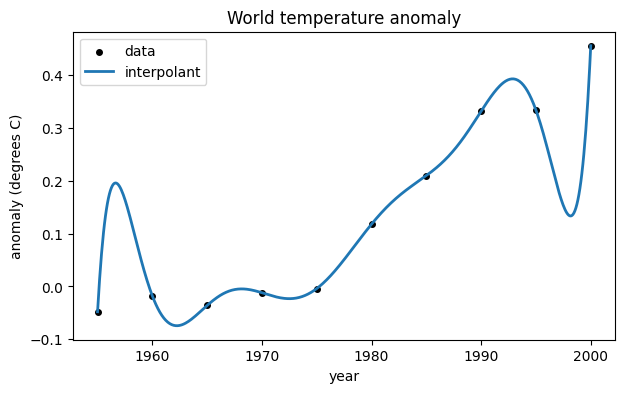

In [4]:
p = poly1d(c)    # convert to a polynomial
tt = linspace(1955, 2000, 500)
ax.plot(tt, p((tt - 1950) / 10), label="interpolant")
ax.legend();
fig

As you can see, the interpolant does represent the data, in a sense. However it's a crazy-looking curve for the application. Trying too hard to reproduce all the data exactly is known as _overfitting_.